# Preprocessing I

We present different techniques for preprocess the raw data, turning into something usefull and fill the missing or incorrect values.


By Mario Martín, modify by Manuel Gijón on April 2024.

----

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# These are just visualizations options for pandas' outputs
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.precision", 3)

%matplotlib inline

# Read the data

In [6]:
data = pd.read_csv(
    "brain_size.csv",  # We can select a local file or pass an url
    sep = ';', 
    na_values = "."
)
print(f"We have {data.shape[0]} samples and {data.shape[1]} features.")  # Shape returns (nº samples, nº features)
print(data.describe())

data["Index"]  # Lets see it to see what it contains -> Just indexes, so we can remove them

We have 40 samples and 8 features.
       Index     FSIQ      VIQ      PIQ   Weight  Height  MRI_Count
count  40.00   40.000   40.000   40.000   38.000  39.000  4.000e+01
mean   20.50  117.450  112.350  111.025  151.053  68.526  9.088e+05
std    11.69   31.137   23.616   22.471   23.479   3.995  7.228e+04
min     1.00   77.000   71.000   72.000  106.000  62.000  7.906e+05
25%    10.75   90.750   90.000   88.250  135.250  66.000  8.559e+05
50%    20.50  131.000  113.000  115.000  146.500  68.000  9.054e+05
75%    30.25  138.250  129.750  128.000  172.000  70.500  9.501e+05
max    40.00  240.000  150.000  150.000  192.000  77.000  1.080e+06


0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
Name: Index, dtype: int64

In [7]:
data = data.drop(labels = 'Index', axis = 1)  # OBS: axis = 1 to drop columns

print(f"We have {data.shape[0]} samples and {data.shape[1]} features.")
data.head()

We have 40 samples and 7 features.


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


# Uni-variate description of the data

In [9]:
data.describe(include = "all")  # Generate statistical values for each feature

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40,40.000,40.000,40.000,38.000,39.000,4.000e+01
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,117.450,112.350,111.025,151.053,68.526,9.088e+05
std,NaN,31.137,23.616,22.471,23.479,3.995,7.228e+04
min,NaN,77.000,71.000,72.000,106.000,62.000,7.906e+05
25%,NaN,90.750,90.000,88.250,135.250,66.000,8.559e+05
50%,NaN,131.000,113.000,115.000,146.500,68.000,9.054e+05
75%,NaN,138.250,129.750,128.000,172.000,70.500,9.501e+05


## Boxplots and histograms
We are going to use tools built in pandas' objects themselves instead of relying on external libraries.

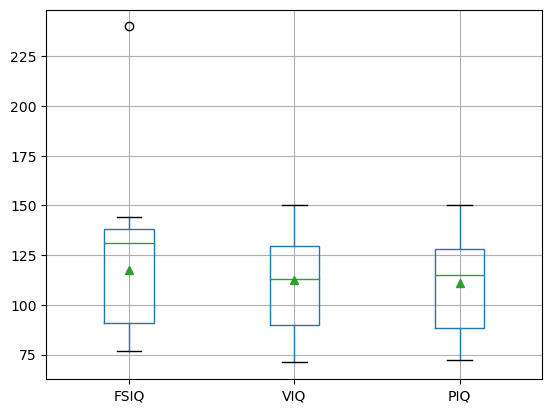

In [10]:
results = data.boxplot(
    column = ["FSIQ", "VIQ", "PIQ"],
    meanline = False,
    showmeans = True,
    return_type = "dict"
)

# OBS: is there an outlier in FSIQ? we have test it with with more powerfull tools than visual representations

array([[<Axes: title={'center': 'FSIQ'}>,
        <Axes: title={'center': 'VIQ'}>],
       [<Axes: title={'center': 'PIQ'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'MRI_Count'}>]], dtype=object)

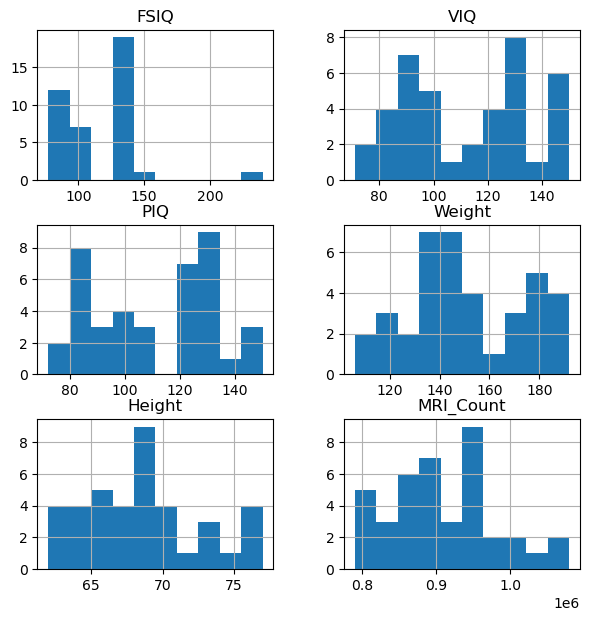

In [12]:
data.hist(
    column = ["FSIQ", "VIQ", "PIQ", "Weight", "Height", "MRI_Count"],
    bins = 10, 
    figsize = [7,7]
)

In [13]:
# Lets create masks to select data 
mask_female = data["Gender"] == "Female"  # OBS: the mask itself returns a pandas Series containing
                                          # True and False for all the samples, True where conditions holds
                                          # so be aware that this is not like a WHERE function in regular DBs.
female = data[mask_female]

male = data[data["Gender"] != "Female"]  # directly, without creating an extra variable

array([[<Axes: title={'center': 'FSIQ'}>]], dtype=object)

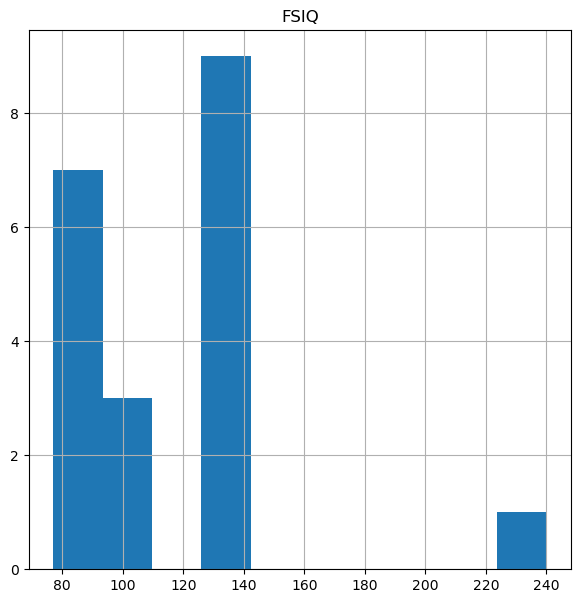

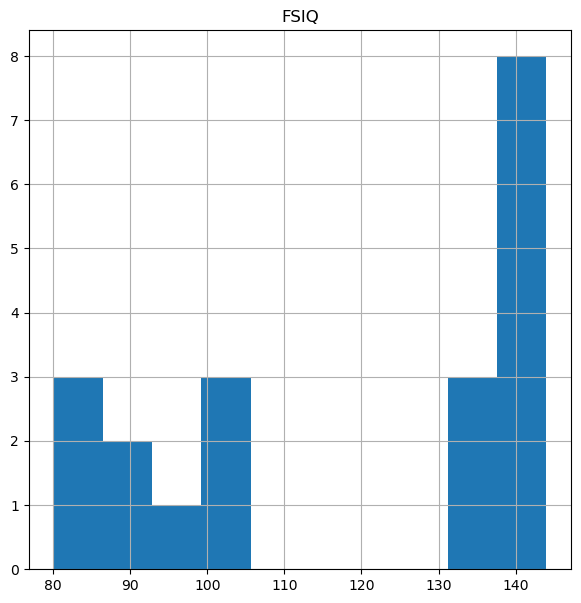

In [14]:
female.hist(
    column = ["FSIQ"], 
    bins = 10,
    figsize = [7,7]
)
male.hist(
    column = ["FSIQ"],
    bins = 10, 
    figsize = [7,7]
)

## Identify errors or ouliers - unicariate analysis

In [16]:
data.corr(method = "pearson")

/var/folders/9y/h_htr0yd59j121xzw7vclx6h0000gn/T/ipykernel_42962/3546452317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method = "pearson")


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000,0.771,0.707,-0.168,-0.091,0.205
VIQ,0.771,1.000,0.778,-0.076,-0.071,0.337
PIQ,0.707,0.778,1.000,0.003,-0.077,0.387
Weight,-0.168,-0.076,0.003,1.000,0.700,0.513
Height,-0.091,-0.071,-0.077,0.700,1.000,0.602
MRI_Count,0.205,0.337,0.387,0.513,0.602,1.000


### Finding errors (or outliers) with bi-variate analysis

Lets consider this situation: we think that we have an outlier in one feature, but we do not known a specific statistical test for the distribution that this data follow (assuming we are able to identify it for sure).

In this situation we have another **tool** that is the one that we are going to present here: using a highly correlated feature, apply a linear regression between two variables and use the fact that we know how the errors are distributed (**they follow a normal distribution**, [justification](https://towardsdatascience.com/are-the-error-terms-normally-distributed-in-a-linear-regression-model-15e6882298a4)) to apply a statistical test to them (to the errors).

Remember that we consider an outlier of a sample of points that follow a normal distribution of mean $\mu$ and std $\sigma$ to all the points (x) in the region defined by:
$$
    \mu - 2 * \sigma < x 
$$
and 
$$
       x > \mu + 2 * \sigma  
$$

In [17]:
# Let's do regression between a pari of numeric varaibales
def fit_func(x, a, b):
    return a*x+b

params = curve_fit(fit_func, data.PIQ,data.FSIQ )  # Here we fit the linear regression and keep the parameters
print(f"a = {params[0][0]} - b = {params[0][1]}")

# Find errors or outliers
error = data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ]
print(np.std(error))
print(error[ error > np.mean(error) + 2 * np.std(error)])

data[data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ]==max(data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ])]

a = 0.9789556935911965 - b = 8.761444119049234
21.758362595400268
8      50.006
16    113.764
Name: FSIQ, dtype: float64


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
16,Female,240,132,120,127.0,68.5,852244


### Solving the error susbtituting current value by predicted value with linear regression 

In [20]:
# We use the value on the adjusted line to "predict" a value to replace the outlier 
data.FSIQ.at[8] = fit_func(data['PIQ'][8], params[0][0], params[0][1])  # OBS: remember data.FSIQ == data["FSIQ"]
data.head(10)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133.000,132,124,118.0,64.5,816932
1,Male,140.000,150,124,NaN,72.5,1001121
2,Male,139.000,123,150,143.0,73.3,1038437
3,Male,133.000,129,128,172.0,68.8,965353
4,Female,137.000,132,134,147.0,65.0,951545
5,Female,99.000,90,110,146.0,69.0,928799
6,Female,138.000,136,131,138.0,64.5,991305
7,Female,92.000,90,98,175.0,66.0,854258
8,Male,90.994,93,84,134.0,66.3,904858
9,Male,133.000,114,147,172.0,68.8,955466


Scatter matrixes for correlations betwen numeriacal variables 


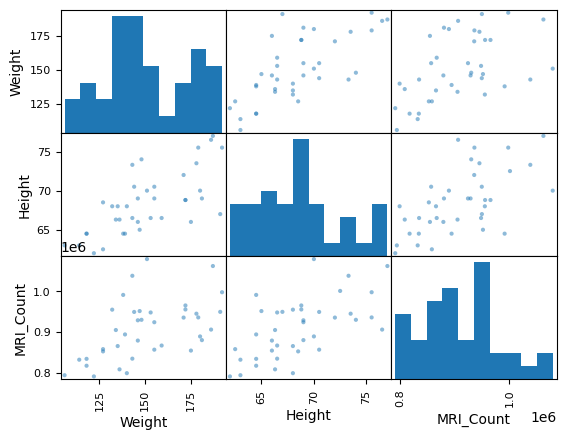

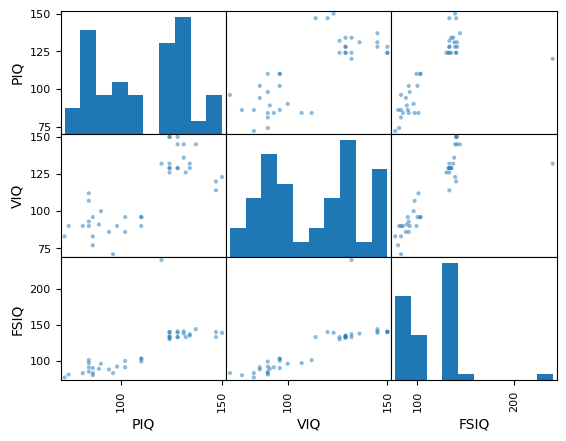

In [21]:
pd.plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
pd.plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
print('Scatter matrixes for correlations betwen numeriacal variables ')

#  Missing data

In [23]:
data.isnull().any()  # isnull() will return a Series with True and False in all positions, with any() we apply the
                     # logical any to all the values en each one of the features

Gender       False
FSIQ         False
VIQ          False
PIQ          False
Weight        True
Height        True
MRI_Count    False
dtype: bool

In [26]:
data[data.Weight.isnull()]  # Again, we use it as a mask for selecting tha samples that holds this condition
data[data["Weight"].isnull()]
#data.FSIQ.mean() # 114.3076923076923

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Male,140.0,150,124,NaN,72.5,1001121
20,Male,83.0,83,86,NaN,NaN,892420


In [27]:
data[data.Height.isnull()]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
20,Male,83.0,83,86,NaN,NaN,892420


### Let's solve the case 1 of Weight with regression according to Height because both variables are highly correlated

In [29]:
df = data.dropna()  # To drop the na values

In [31]:
def fit_func(x, a, b):
    return a*x+b

params = curve_fit(fit_func, df["Height"], df["Weight"])  # Again we use the value on the fitted line

print(f"a = {params[0][0]} - b = {params[0][1]}")

a = 4.1128591099915 - b = -130.35351805204996


### First we have to filter the NaNs

In [32]:
df = data.dropna(axis=0)
df

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133.000,132,124,118.0,64.5,816932
2,Male,139.000,123,150,143.0,73.3,1038437
3,Male,133.000,129,128,172.0,68.8,965353
4,Female,137.000,132,134,147.0,65.0,951545
5,Female,99.000,90,110,146.0,69.0,928799
6,Female,138.000,136,131,138.0,64.5,991305
7,Female,92.000,90,98,175.0,66.0,854258
8,Male,90.994,93,84,134.0,66.3,904858
9,Male,133.000,114,147,172.0,68.8,955466
10,Female,132.000,129,124,118.0,64.5,833868


In [33]:
def fit_func(x, a, b):
    return a * x + b

params = curve_fit(fit_func, df.Height, df.Weight)
print('a=',params[0][0], 'b=',params[0][1])

a= 4.1128591099915 b= -130.35351805204996


In [34]:
idx = data.Weight.isnull()
#data.set_value(idx, 'Weight', fit_func(data['Height'][idx],params[0][0],params[0][1]))

#data.set_value(idx, 'Weight', fit_func(data['Height'][idx],params[0][0],params[0][1]))
print(fit_func(data['Height'][idx], params[0][0], params[0][1]))
data.Weight[idx] = fit_func(data['Height'][idx], params[0][0], params[0][1])

1     167.829
20        NaN
Name: Height, dtype: float64


/var/folders/9y/h_htr0yd59j121xzw7vclx6h0000gn/T/ipykernel_42962/2063143036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Weight[idx] = fit_func(data['Height'][idx], params[0][0], params[0][1])


### For the remainding Nas, we will replace the value with the average of the column

In [35]:
data.fillna(data.mean())  # With this pandas' functions directly we can replace nans for the mean in the feature
                          # Just be aware of not change too much the distribution on the value after doing this process

/var/folders/9y/h_htr0yd59j121xzw7vclx6h0000gn/T/ipykernel_42962/1751859613.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean())  # With this pandas' functions directly we can replace nans for the mean in the feature


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133.000,132,124,118.000,64.500,816932
1,Male,140.000,150,124,167.829,72.500,1001121
2,Male,139.000,123,150,143.000,73.300,1038437
3,Male,133.000,129,128,172.000,68.800,965353
4,Female,137.000,132,134,147.000,65.000,951545
5,Female,99.000,90,110,146.000,69.000,928799
6,Female,138.000,136,131,138.000,64.500,991305
7,Female,92.000,90,98,175.000,66.000,854258
8,Male,90.994,93,84,134.000,66.300,904858
9,Male,133.000,114,147,172.000,68.800,955466
